# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
![image.png](attachment:image.png)

# 1. Import Libraries

In [83]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from sklearn import datasets

In [84]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# 2. Load Data

In [85]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [86]:
X = boston.data
y = boston.target

# 3. Train test split

In [87]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

# 4. Simple Linear Model

In [88]:
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression()
linearReg.fit(xtrain, ytrain)

LinearRegression()

In [89]:
linearReg.score(xtrain, ytrain)

0.7481902582492905

In [90]:
linearReg.score(xtest, ytest)

0.7081873488673206

# 5. Ridge Regularization for Linear Model

In [91]:
from sklearn.linear_model import Ridge
modelr = Ridge(alpha=1)
modelr.fit(xtrain, ytrain)
modelr.score(xtrain, ytrain)

0.7464905480577202

In [92]:
modelr.score(xtest, ytest)

0.7012675427930308

# 6. Lasso Regularization for Linear Model

In [93]:
from sklearn.linear_model import Lasso
modelL = Lasso(alpha=0.1)
modelL.fit(xtrain, ytrain)
modelL.score(xtrain, ytrain)

0.7389313482470027

In [94]:
modelL.score(xtest, ytest)

0.693332904701107

# 7. Polynomial Regression of degree 2

In [95]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
xtrain_poly = pf.fit_transform(xtrain)
xtest_poly = pf.fit_transform(xtest)

In [96]:
lrp = LinearRegression()
lrp.fit(xtrain_poly, ytrain)
lrp.score(xtrain_poly, ytrain)

0.9249974665408315

In [97]:
lrp.score(xtest_poly, ytest)
#value is low so overfitting 

0.7196191416372151

# 8. Ridge Regularization for Polynomial model

In [98]:
modelrp = Ridge(alpha=10000000)
modelrp.fit(xtrain_poly, ytrain)
modelrp.score(xtrain_poly, ytrain)

0.7665058249661384

In [99]:
modelrp.score(xtest_poly, ytest)

0.7448548953040331

# 9. Lasso Regularization for Polynomial model

In [100]:
modelrp = Lasso(alpha=1)
modelrp.fit(xtrain_poly, ytrain)
modelrp.score(xtrain_poly, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.868e+03, tolerance: 2.900e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.8895046252702129

In [101]:
modelrp.score(xtest_poly, ytest)

0.7905343112135357

# 10. Select K Best

In [102]:
#implementing feature selection using SelectKBest class
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
kb = SelectKBest(score_func=f_regression,k=11)
x_selected = kb.fit_transform(xtrain,ytrain)
x_selected.shape

(354, 11)

In [103]:
kb1 = LinearRegression()
kb1.fit(x_selected,ytrain)
kb1.score(x_selected, ytrain)

0.7163690723438134

In [104]:
pf2 = PolynomialFeatures(degree=2)
x_selected_poly = pf2.fit_transform(x_selected)

In [105]:
lrp = LinearRegression()
lrp.fit(x_selected_poly,ytrain)
lrp.score(x_selected_poly,ytrain)

0.6026387316142814

In [106]:
#manual feature selection
traindf = pd.DataFrame(data = xtrain,columns = boston.feature_names)
traindf['target'] = ytrain
traindf.head()

CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
0  0.04417  70.0   2.24   0.0  0.4000  6.871  47.4  7.8278   5.0  358.0   
1  0.95577   0.0   8.14   0.0  0.5380  6.047  88.8  4.4534   4.0  307.0   
2  0.09065  20.0   6.96   1.0  0.4640  5.920  61.5  3.9175   3.0  223.0   
3  3.83684   0.0  18.10   0.0  0.7700  6.251  91.1  2.2955  24.0  666.0   
4  0.03510  95.0   2.68   0.0  0.4161  7.853  33.2  5.1180   4.0  224.0   

   PTRATIO       B  LSTAT  target  
0     14.8  390.86   6.07    24.8  
1     21.0  306.38  17.28    14.8  
2     18.6  391.34  13.65    20.7  
3     20.2  350.65  14.19    19.9  
4     14.7  392.78   3.81    48.5

In [107]:
corr = traindf.corr()

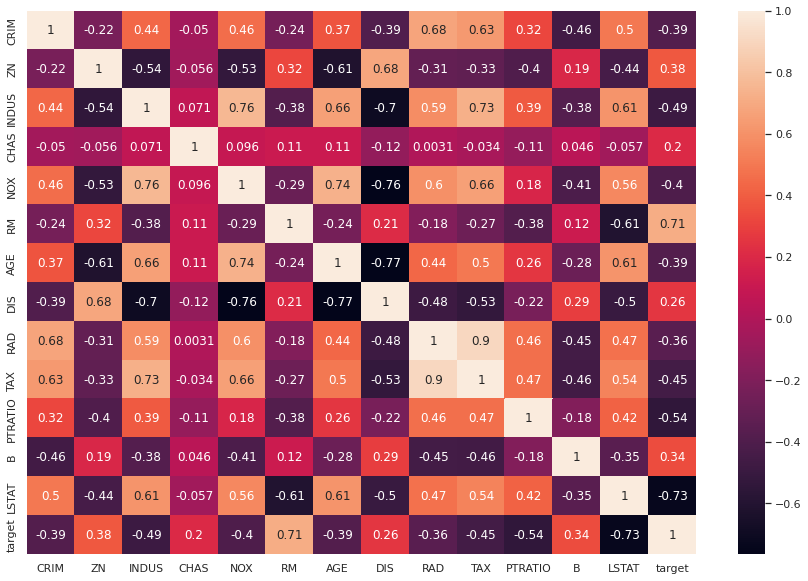

In [108]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data = corr,annot = True)
plt.show()

In [109]:
columns = ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM']

In [110]:
sdf=df[columns]
sdf.head()

RM  LSTAT  PTRATIO  INDUS    TAX    NOX     CRIM
0  6.575   4.98     15.3   2.31  296.0  0.538  0.00632
1  6.421   9.14     17.8   7.07  242.0  0.469  0.02731
2  7.185   4.03     17.8   7.07  242.0  0.469  0.02729
3  6.998   2.94     18.7   2.18  222.0  0.458  0.03237
4  7.147   5.33     18.7   2.18  222.0  0.458  0.06905

In [111]:
modelm = LinearRegression()
modelm.fit(xtrain, ytrain)
modelm.score(xtrain, ytrain)

0.7481902582492905

In [112]:
modelm.score(xtest, ytest)

0.7081873488673206

# 11. Conclusion

Using Ridge and Lasso Regularization for polynomial model I trained and tested  the model to reduce overfitting. And also the model is fitted appropriately on a given test set to reduce the errors. While using polynomial regression of degree 2, i have got the train score of 92% and test score of 71%. So by using Ridge and Lasso Regularization, i am able to get both test and train score around 80%. 

I used hyperparameter of 10000000 for ridge regularization and 1 for Lasso regularization inorder to regularize the polynomial model.